# CREDIT CARD FRAUD DETECTION 

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from xgboost import XGBClassifier as xgbc
from imblearn.over_sampling import SMOTE

from sklearn.metrics import classification_report,mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

# Loading Dataset 

In [2]:
data = pd.read_csv('creditcard.csv')

# Analysing The Dataset 

In [5]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
data.shape

(284807, 31)

## Checking Outliers 

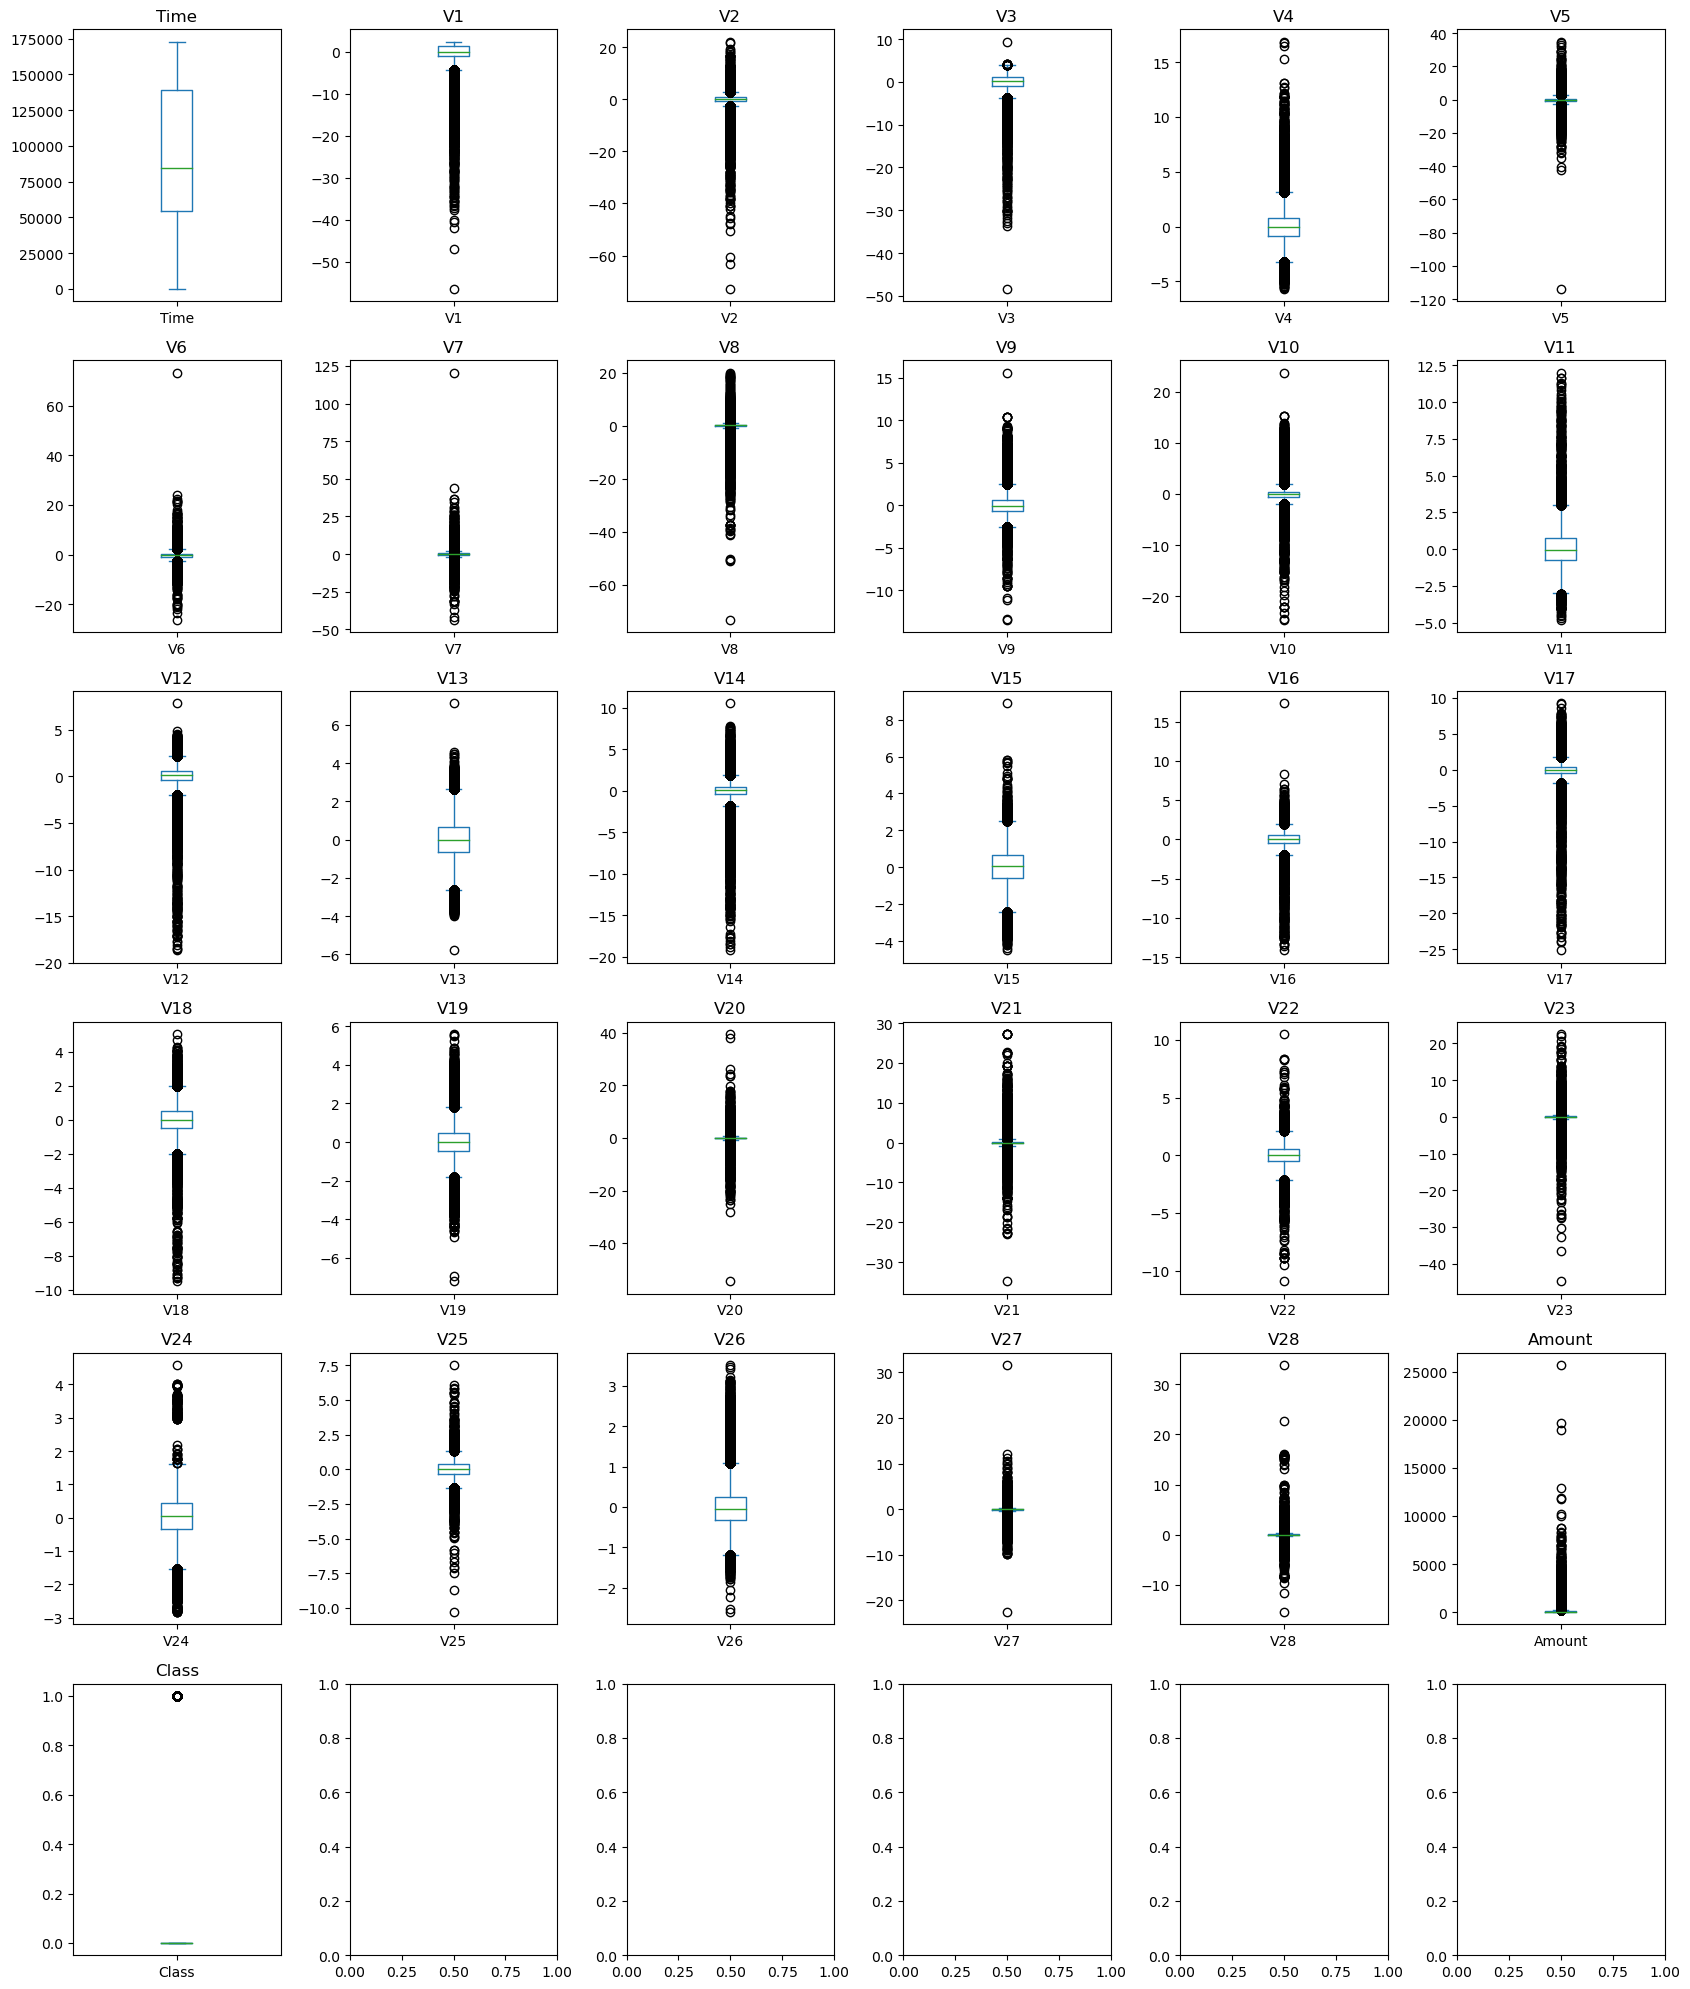

In [10]:
fig, axes = plt.subplots(6,6, figsize = (17,20))
axes = axes.flatten()
for i, col in enumerate(data.columns):
    ax = axes[i]
    data[col].plot(kind = 'box', ax = ax)
    ax.set_title(col)

plt.tight_layout()
plt.show()

F:\program files\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='V1'>

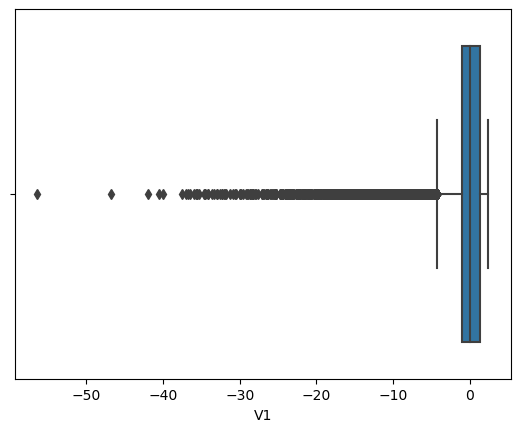

In [9]:
sns.boxplot(data['V1'])

In [10]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Deleting Duplicate Values 

In [3]:
data_1 = data.drop_duplicates()
data_1.shape

(283726, 31)

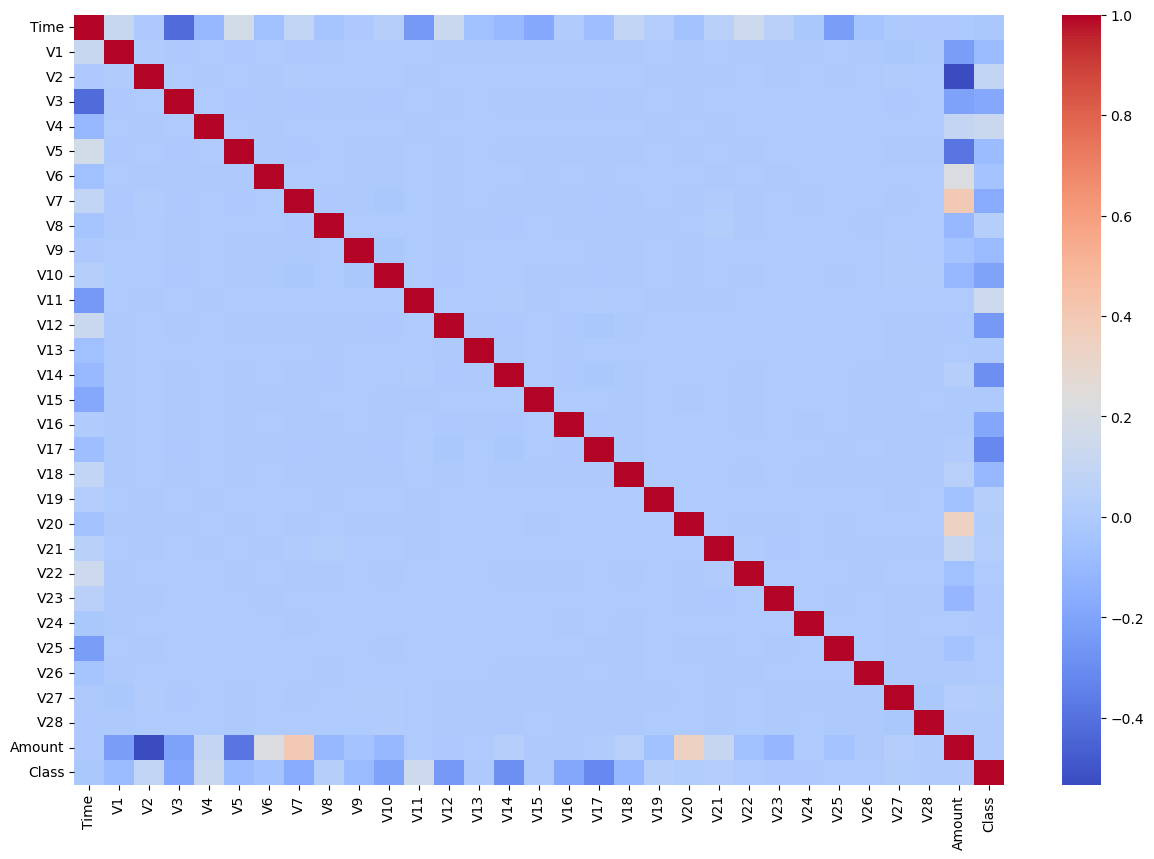

In [12]:
corr_mat = data_1.corr()


plt.figure(figsize = (15,10))
sns.heatmap(corr_mat, cmap = 'coolwarm')

plt.show()

# Choosing The Best Sampling Method 

## OVERSAMPLING 

In [13]:
data_value_0 = data_1[data_1['Class']==0].sample(283253)
data_value_1 = data_1[data_1['Class']==1].sample(283253, replace=True)
data_2 = pd.concat([data_value_0,data_value_1], axis = 0)

In [14]:
x = data_2.drop(columns = 'Class', axis = 1)
y = data_2['Class']

In [15]:
y.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1 )

In [17]:
#Testing Oversampling with LogisticRegression model

lr_model = LogisticRegression(max_iter = 300)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9432016098663152
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     84921
           1       0.96      0.92      0.94     85031

    accuracy                           0.94    169952
   macro avg       0.94      0.94      0.94    169952
weighted avg       0.94      0.94      0.94    169952



## UNDERSAMPLING

In [19]:
data_value_0 = data_1[data_1['Class']==0].sample(473)
data_value_1 = data_1[data_1['Class']==1].sample(473)

In [20]:
data_2 = pd.concat([data_value_0,data_value_1], axis = 0)

In [21]:
data_2.shape

(946, 31)

In [22]:
x = data_2.drop(columns = 'Class', axis = 1)
y = data_2['Class']

In [23]:
y.value_counts()

0    473
1    473
Name: Class, dtype: int64

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 1 )

In [25]:
lr_model = LogisticRegression(max_iter = 300)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8908450704225352

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89       134
           1       0.94      0.85      0.89       150

    accuracy                           0.89       284
   macro avg       0.89      0.89      0.89       284
weighted avg       0.90      0.89      0.89       284



# SMOTE 

In [4]:
x = data_1.drop(columns = 'Class', axis = 1)
y = data_1['Class']

In [5]:
y.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [6]:


smote = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm, test_size = 0.3, random_state = 1 )

In [8]:
lr_model = LogisticRegression(max_iter = 300)
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9565465543212202
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     84918
           1       0.97      0.95      0.96     85034

    accuracy                           0.96    169952
   macro avg       0.96      0.96      0.96    169952
weighted avg       0.96      0.96      0.96    169952



### Selecting Smote method for sampling the data 

# MODEL

## Logistic Regression

In [10]:
lr_model = LogisticRegression(max_iter = 300)

lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

print('accuracy_score : ',accuracy_score(y_test, y_pred))
print('Mean squared error : ',mean_squared_error(y_test, y_pred))
print('Mean absolute error : ',mean_absolute_error(y_test, y_pred))
print('Classification Report : ',classification_report(y_test, y_pred))

accuracy_score :  0.9565465543212202
Mean squared error :  0.043453445678779894
Mean absolute error :  0.043453445678779894
Classification Report :                precision    recall  f1-score   support

           0       0.95      0.97      0.96     84918
           1       0.97      0.95      0.96     85034

    accuracy                           0.96    169952
   macro avg       0.96      0.96      0.96    169952
weighted avg       0.96      0.96      0.96    169952



# THANK YOU 